Task 8
Implement $\text{HyperLogLog}$ with **corrections**.

In [1]:
import math
from typing import List, Union

from matplotlib import pyplot as plt

import data_stream_utils as dsu
import hyperloglog_algorithm as hll_alg
from hyperloglog_algorithm import HyperLogLog
from list_3.min_count_algorithm import MinCount

HASH_FUNCTION_NAME = "sha256"
HASH_BIT_LENGTH = 64
M_LENGTH = 512
SAVE_FIGURES_1 = True
SAVE_FIGURES_2 = True
SAVE_FIGURES_3 = True
KEEP_AXIS = True

import importlib

importlib.reload(dsu)
importlib.reload(hll_alg)

<module 'hyperloglog_algorithm' from '/home/gabriel/white_rose/distributed_algorithms/Labs/list_3/hyperloglog_algorithm.py'>

test it for
- different values of the parameter $m$ (number of registers),

In [9]:
def plot_different_ms(data: List[List[Union[int, float]]]):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data[0]) + 1)
    axs[0, 0].scatter(x=n_range, y=data[0], c='midnightblue', label='m=32', s=1)
    axs[0, 1].scatter(x=n_range, y=data[1], c='violet', label='m=64', s=1)
    axs[0, 2].scatter(x=n_range, y=data[2], c='forestgreen', label='m=128', s=1)
    axs[1, 0].scatter(x=n_range, y=data[3], c='chocolate', label='m=256', s=1)
    axs[1, 1].scatter(x=n_range, y=data[4], c='royalblue', label='m=512', s=1)

    axs[1, 2].scatter(x=n_range, y=data[0], c='midnightblue', label='m=32', s=1)
    axs[1, 2].scatter(x=n_range, y=data[1], c='violet', label='m=64', s=1)
    axs[1, 2].scatter(x=n_range, y=data[2], c='forestgreen', label='m=128', s=1)
    axs[1, 2].scatter(x=n_range, y=data[3], c='chocolate', label='m=256', s=1)
    axs[1, 2].scatter(x=n_range, y=data[4], c='royalblue', label='m=512', s=1)

    # Set titles for the main plot and subplots
    axs[0, 0].set_title('m=32')
    axs[0, 1].set_title('m=64')
    axs[0, 2].set_title('m=128')
    axs[1, 0].set_title('m=256')
    axs[1, 1].set_title('m=512')
    axs[1, 2].set_title('Merged results for all values of m.')

    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)
        if KEEP_AXIS is True:
            ax.set_ylim([0, 2])
        ax.legend()

    fig.suptitle(r'$\frac{\hat{n}}{n}$ for different m values.')
    plt.legend()
    if SAVE_FIGURES_1 is True:
        plt.savefig('figures/different_ms_fig.png')
    plt.show()

finished m=32
finished m=64
finished m=128
finished m=256
finished m=512


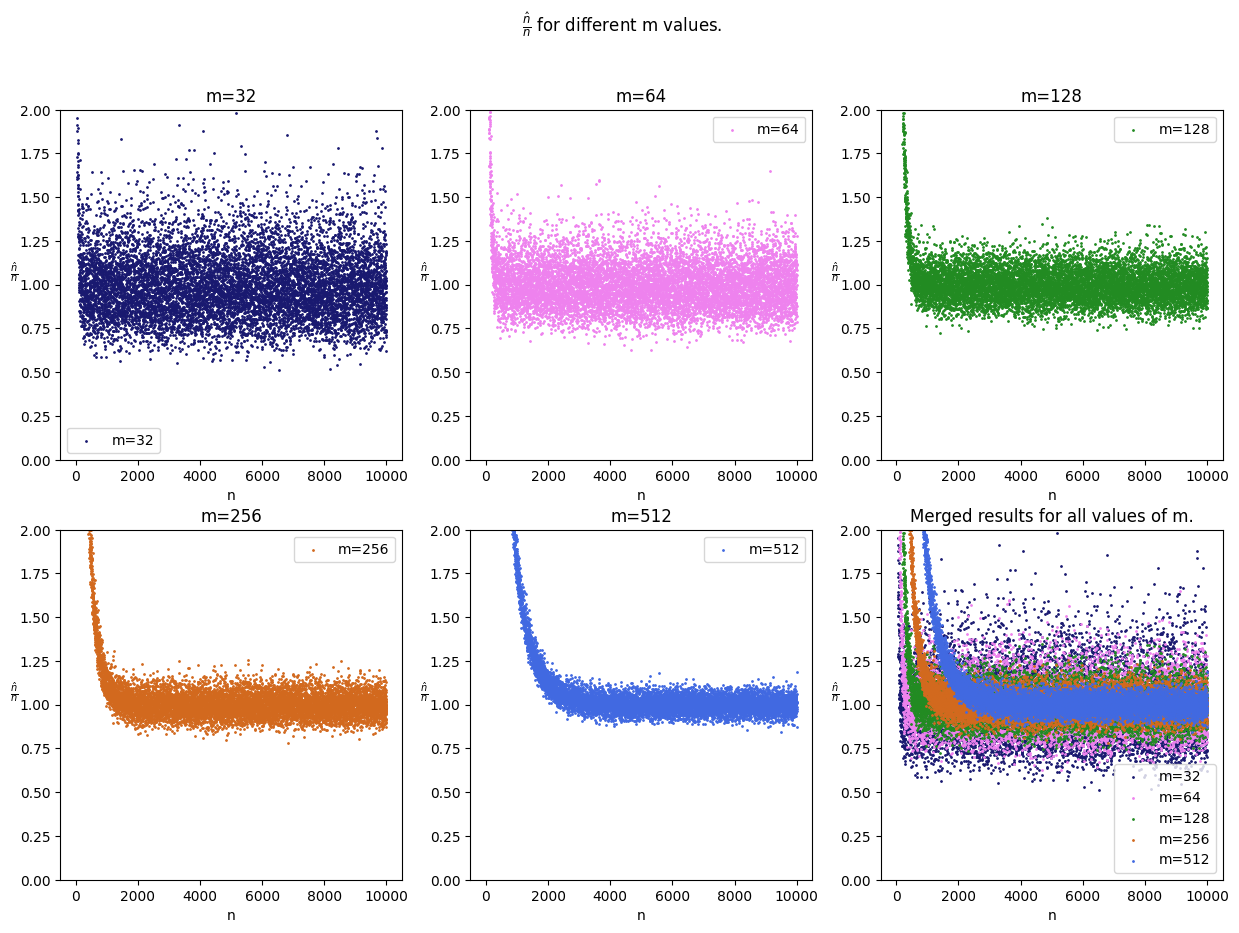

In [10]:
hyper_log_log = HyperLogLog(M_length=1,
                            h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME,
                                              return_type="truncated_hash"))
plot_data = [[], [], [], [], []]
for dim, m in enumerate([32, 64, 128, 256, 512]):
    hyper_log_log.replace_M_length(M_length=m)
    for n, range_start, range_end in dsu.disjoint_ranges_generator():
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        hyper_log_log.replace_data_stream(data_stream=data_stream)
        hyper_log_log.consume_data_stream()
        n_hat = hyper_log_log.estimate_number_of_elements()
        plot_data[dim].append(n_hat / n)
    print(f"finished {m=}")

plot_different_ms(data=plot_data)

test it for
- different hash functions.

In [34]:
def plot_different_hashes(data: List[List[Union[int, float]]]):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data[0]) + 1)
    axs[0, 0].scatter(x=n_range, y=data[0], c='midnightblue', label='sha1', s=1)
    axs[0, 1].scatter(x=n_range, y=data[1], c='violet', label='sha256', s=1)
    axs[0, 2].scatter(x=n_range, y=data[2], c='forestgreen', label='blake2b', s=1)
    axs[1, 0].scatter(x=n_range, y=data[3], c='chocolate', label='md5', s=1)
    axs[1, 1].scatter(x=n_range, y=data[4], c='royalblue', label='bad_hash', s=1)

    axs[1, 2].scatter(x=n_range, y=data[0], c='midnightblue', label='sha1', s=1)
    axs[1, 2].scatter(x=n_range, y=data[1], c='violet', label='sha256', s=1)
    axs[1, 2].scatter(x=n_range, y=data[2], c='forestgreen', label='blake2b', s=1)
    axs[1, 2].scatter(x=n_range, y=data[3], c='chocolate', label='md5', s=1)
    axs[1, 2].scatter(x=n_range, y=data[4], c='royalblue', label='bad_hash', s=1)

    # Set titles for the main plot and subplots
    axs[0, 0].set_title('sha1')
    axs[0, 1].set_title('sha256')
    axs[0, 2].set_title('blake2b')
    axs[1, 0].set_title('md5')
    axs[1, 1].set_title('bad_hash')
    axs[1, 2].set_title('Merged results for all hashes.')

    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)
        if KEEP_AXIS is True:
            ax.set_ylim([0, 2])
        ax.legend()

    fig.suptitle(r'$\frac{\hat{n}}{n}$ for different hash functions ($m=512$).')
    plt.legend()
    if SAVE_FIGURES_2 is True:
        plt.savefig('figures/different_hashes_fig.png')
    plt.show()

finished hash_function_name='sha1'
finished hash_function_name='sha256'
finished hash_function_name='blake2b'
finished hash_function_name='md5'
finished hash_function_name='bad_hash'


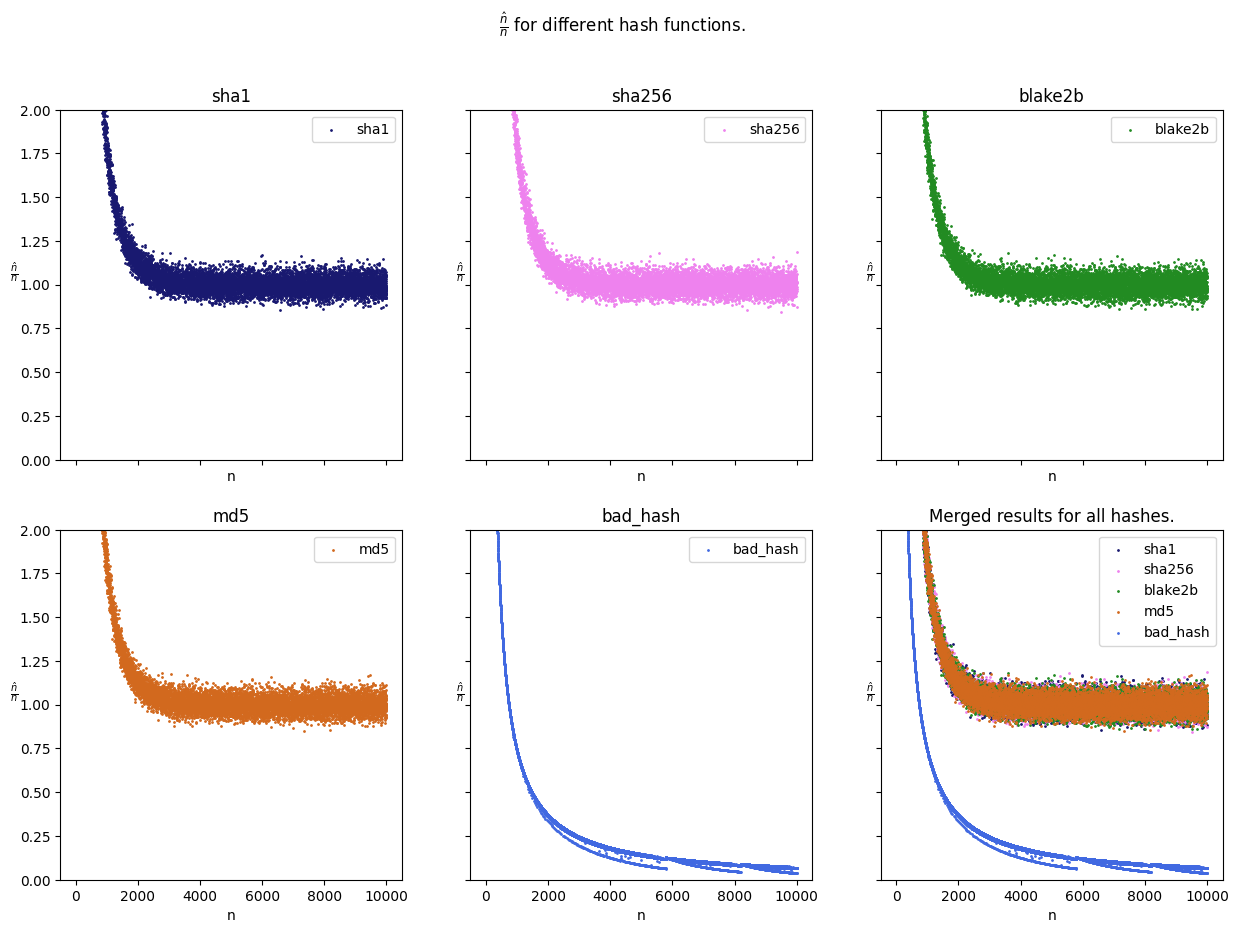

In [6]:
plot_data = [[], [], [], [], []]
for i, (hash_function_name, hash_function) in enumerate(dsu.HASH_FUNCTIONS_DICT.items()):
    hyper_log_log = HyperLogLog(M_length=M_LENGTH,
                                h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=hash_function_name,
                                                  return_type="truncated_hash"))
    for n, range_start, range_end in dsu.disjoint_ranges_generator():
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        hyper_log_log.replace_data_stream(data_stream=data_stream)
        hyper_log_log.consume_data_stream()
        n_hat = hyper_log_log.estimate_number_of_elements()
        plot_data[i].append(n_hat / n)
    print(f"finished {hash_function_name=}")

plot_different_hashes(data=plot_data)

Create plots analogous to those from Task 5.
- Consider the multisets $M_n = (S_n , m)$ such that $|S_n| = n$ for $n = 1, 2, . . . , 10^4$ and all sets $S_n$ are disjoint. Does changing the $m$ function affect the value of the $\hat{n}$ estimation obtained in the algorithm?

In [7]:
hyper_log_log = HyperLogLog(M_length=M_LENGTH,
                            h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME,
                                              return_type="truncated_hash"))

for _, range_start, range_end in dsu.disjoint_ranges_generator(upper_bound=1000):
    mul_verification_array = []
    for i, multiplicity_range in enumerate([1, 2, (1, 3)]):
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end),
                                            multiplicity_range=multiplicity_range)
        hyper_log_log.replace_data_stream(data_stream=data_stream)
        hyper_log_log.consume_data_stream()
        n_hat = hyper_log_log.estimate_number_of_elements()
        mul_verification_array.append(n_hat)  # add n_hat cord

    # if all elements are equal, thus multiplicity has no impact.
    if not all(elem == mul_verification_array[0] for elem in mul_verification_array):
        raise Exception("Multiplicity have impact.")
print("Multiplicity has no impact.")

Multiplicity has no impact.


- Experimentally adjust the value of $m$ so that there is $95\%$ probability that $|\frac{\hat{n}}{n} − 1| < 10\%$.

In [6]:
def just_plot(data: List[List[Union[int, float]]]):
    plt.scatter(x=data[0], y=data[1], c='red', s=1)
    plt.xlabel('n')
    plt.ylabel('res')
    plt.ylim([0, 2])
    plt.show()

In [ ]:
m = 2
hyper_log_log = HyperLogLog(M_length=m,
                            h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME,
                                              return_type="truncated_hash"))
exp_result = [[], []]
n_upper_bound = 10 ** 4
for dim, m in enumerate([256, 512, 1024, 2048, 4096, 8192]):
    hyper_log_log.replace_M_length(M_length=m)
    for n, range_start, range_end in dsu.disjoint_ranges_generator(upper_bound=n_upper_bound):
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))
        hyper_log_log.replace_data_stream(data_stream=data_stream)
        hyper_log_log.consume_data_stream()
        n_hat = hyper_log_log.estimate_number_of_elements()
        exp_result[0].append(n)
        exp_result[1].append(n_hat / n)

    in_bands_percent = dsu.get_in_bands_percent(data=exp_result[1])
    print(f"{m=}, {in_bands_percent=}")
    if in_bands_percent >= 0.95:
        print(f"{m=} satisfies in bands check for 95% for {n_upper_bound=}")
        break
    print(f"{m=} doesn't satisfy in bands check for 95% for {n_upper_bound=}")
    # just_plot(data=exp_result)
    exp_result = [[], []]

Compare the estimation accuracy of the $\text{HyperLogLog}$ and $\text{MinCount}$ algorithms **when both have the same amount of memory** available (you can assume that $\text{HyperLogLog}$ needs $5$ bits per register and $\text{MinCount}$ needs $32$ bits per stored hash).

We assume that
$$ m = 2^b, b \in \mathbb{Z}^+, $$ then
$$ k = \frac{5}{32}m = 5 \cdot 2^{b-5}. $$

We will iterate over $b$.

In [18]:
def plot_min_count_hyper_log_log_comparison(data):
    # Create the figure and subplots
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Add each scatter plot to the main plot and each subplot
    n_range = range(1, len(data[0][0]) + 1)
    axs[0, 0].scatter(x=n_range, y=data[0][0], c='midnightblue', label='m=32', s=1)
    axs[0, 0].scatter(x=n_range, y=data[0][1], c='violet', label='k=5', s=1)
    axs[0, 0].set_ylim([0,2])

    axs[0, 1].scatter(x=n_range, y=data[1][0], c='midnightblue', label='m=64', s=1)
    axs[0, 1].scatter(x=n_range, y=data[1][1], c='violet', label='k=10', s=1)
    axs[0, 1].set_ylim([0,2])

    axs[0, 2].scatter(x=n_range, y=data[2][0], c='midnightblue', label='m=128', s=1)
    axs[0, 2].scatter(x=n_range, y=data[2][1], c='violet', label='k=20', s=1)
    axs[0, 2].set_ylim([0,2])

    axs[1, 0].scatter(x=n_range, y=data[3][0], c='midnightblue', label='m=256', s=1)
    axs[1, 0].scatter(x=n_range, y=data[3][1], c='violet', label='k=40', s=1)
    axs[1, 0].set_ylim([0.5, 1.5])

    axs[1, 1].scatter(x=n_range, y=data[4][0], c='midnightblue', label='m=512', s=1)
    axs[1, 1].scatter(x=n_range, y=data[4][1], c='violet', label='k=80', s=1)
    axs[1, 1].set_ylim([0.5, 1.5])

    axs[1, 2].scatter(x=n_range, y=data[5][0], c='midnightblue', label='m=1024', s=1)
    axs[1, 2].scatter(x=n_range, y=data[5][1], c='violet', label='k=160', s=1)
    axs[1, 2].set_ylim([0.5, 1.5])

    for ax in axs.flat:
        ax.set_xlabel('n')
        ax.set_ylabel(r'$\frac{\hat{n}}{n}$', rotation=0)
        ax.legend()

    fig.suptitle(r'Comparison of $\frac{\hat{n}}{n}$ for the same memory size.')
    plt.legend()
    if SAVE_FIGURES_3 is True:
        plt.savefig('figures/min_count_hyper_log_log_comparison_fig.png')
    plt.show()

finished b=5
finished b=6
finished b=7
finished b=8
finished b=9
finished b=10


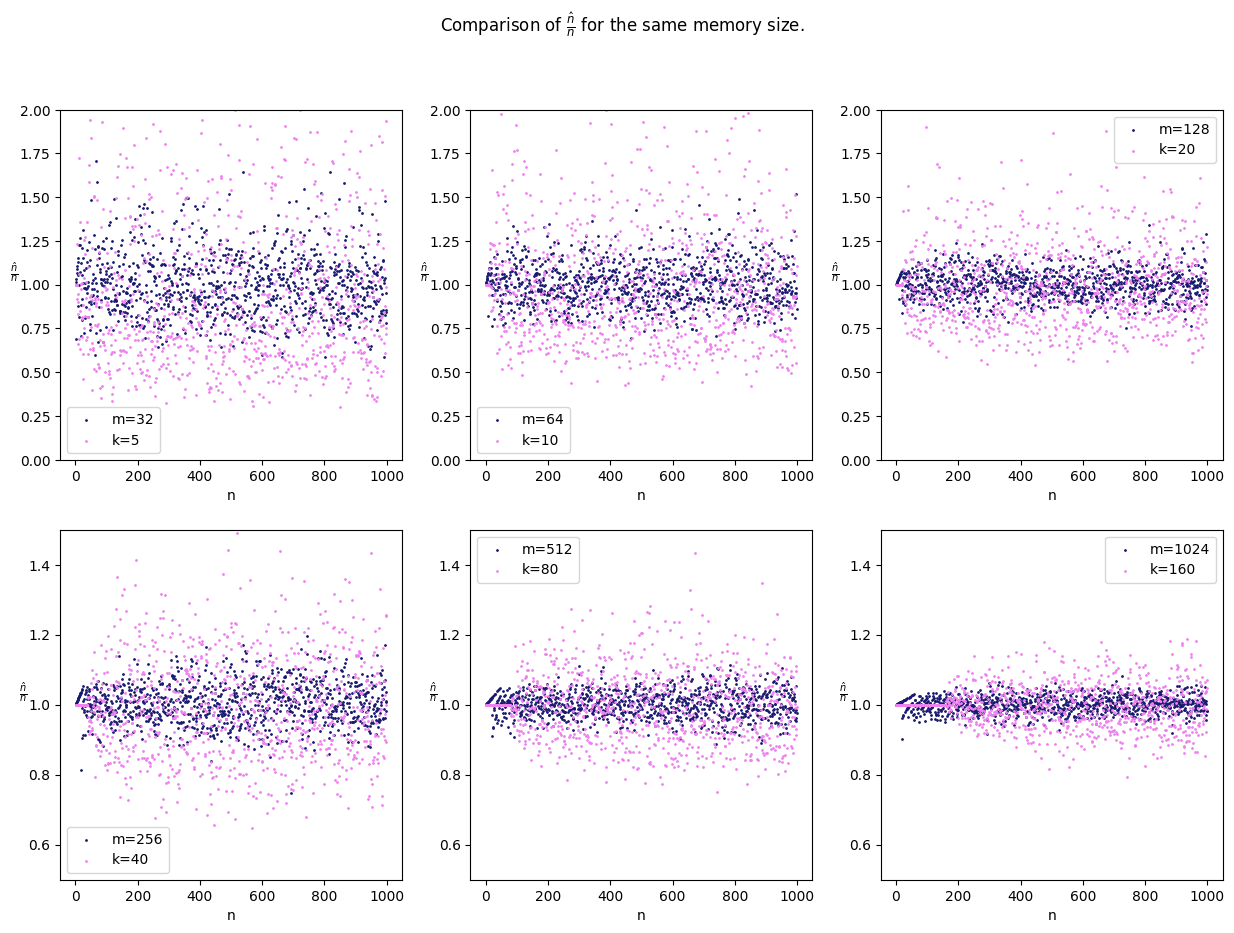

In [19]:
min_count = MinCount(M_length=2,
                     h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME,
                                       return_type="truncated_normalized_hash"))
hyper_log_log = HyperLogLog(M_length=2,
                            h=dsu.define_hash(bit_length=HASH_BIT_LENGTH, hash_function_name=HASH_FUNCTION_NAME,
                                              return_type="truncated_hash"))
plot_data = [[[], []], [[], []], [[], []], [[], []], [[], []], [[], []]]
for dim, b in enumerate([5, 6, 7, 8, 9, 10]):
    m = 2 ** b
    k = 5 * 2 ** (b - 5)

    hyper_log_log.replace_M_length(M_length=m)
    min_count.replace_M_length(M_length=k)
    for n, range_start, range_end in dsu.disjoint_ranges_generator(1000):
        data_stream = dsu.generate_multiset(elements_range=(range_start, range_end))

        hyper_log_log.replace_data_stream(data_stream=data_stream)
        min_count.replace_data_stream(data_stream=data_stream)

        hyper_log_log.consume_data_stream()
        min_count.consume_data_stream()

        n_hat_hll = hyper_log_log.estimate_number_of_elements()
        n_hat_mc = min_count.estimate_number_of_elements()

        plot_data[dim][0].append(n_hat_hll / n)
        plot_data[dim][1].append(n_hat_mc / n)
    print(f"finished {b=}")

plot_min_count_hyper_log_log_comparison(data=plot_data)